In [2]:
# Import necessary libraries for data analysis and visualization
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations

## Data Collection

In [3]:
# Load the dataset into a pandas DataFrame
data = pd.read_excel('../../Data/Raw_File/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data  # Display the DataFrame

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


## Exploratory Data Analysis (EDA)

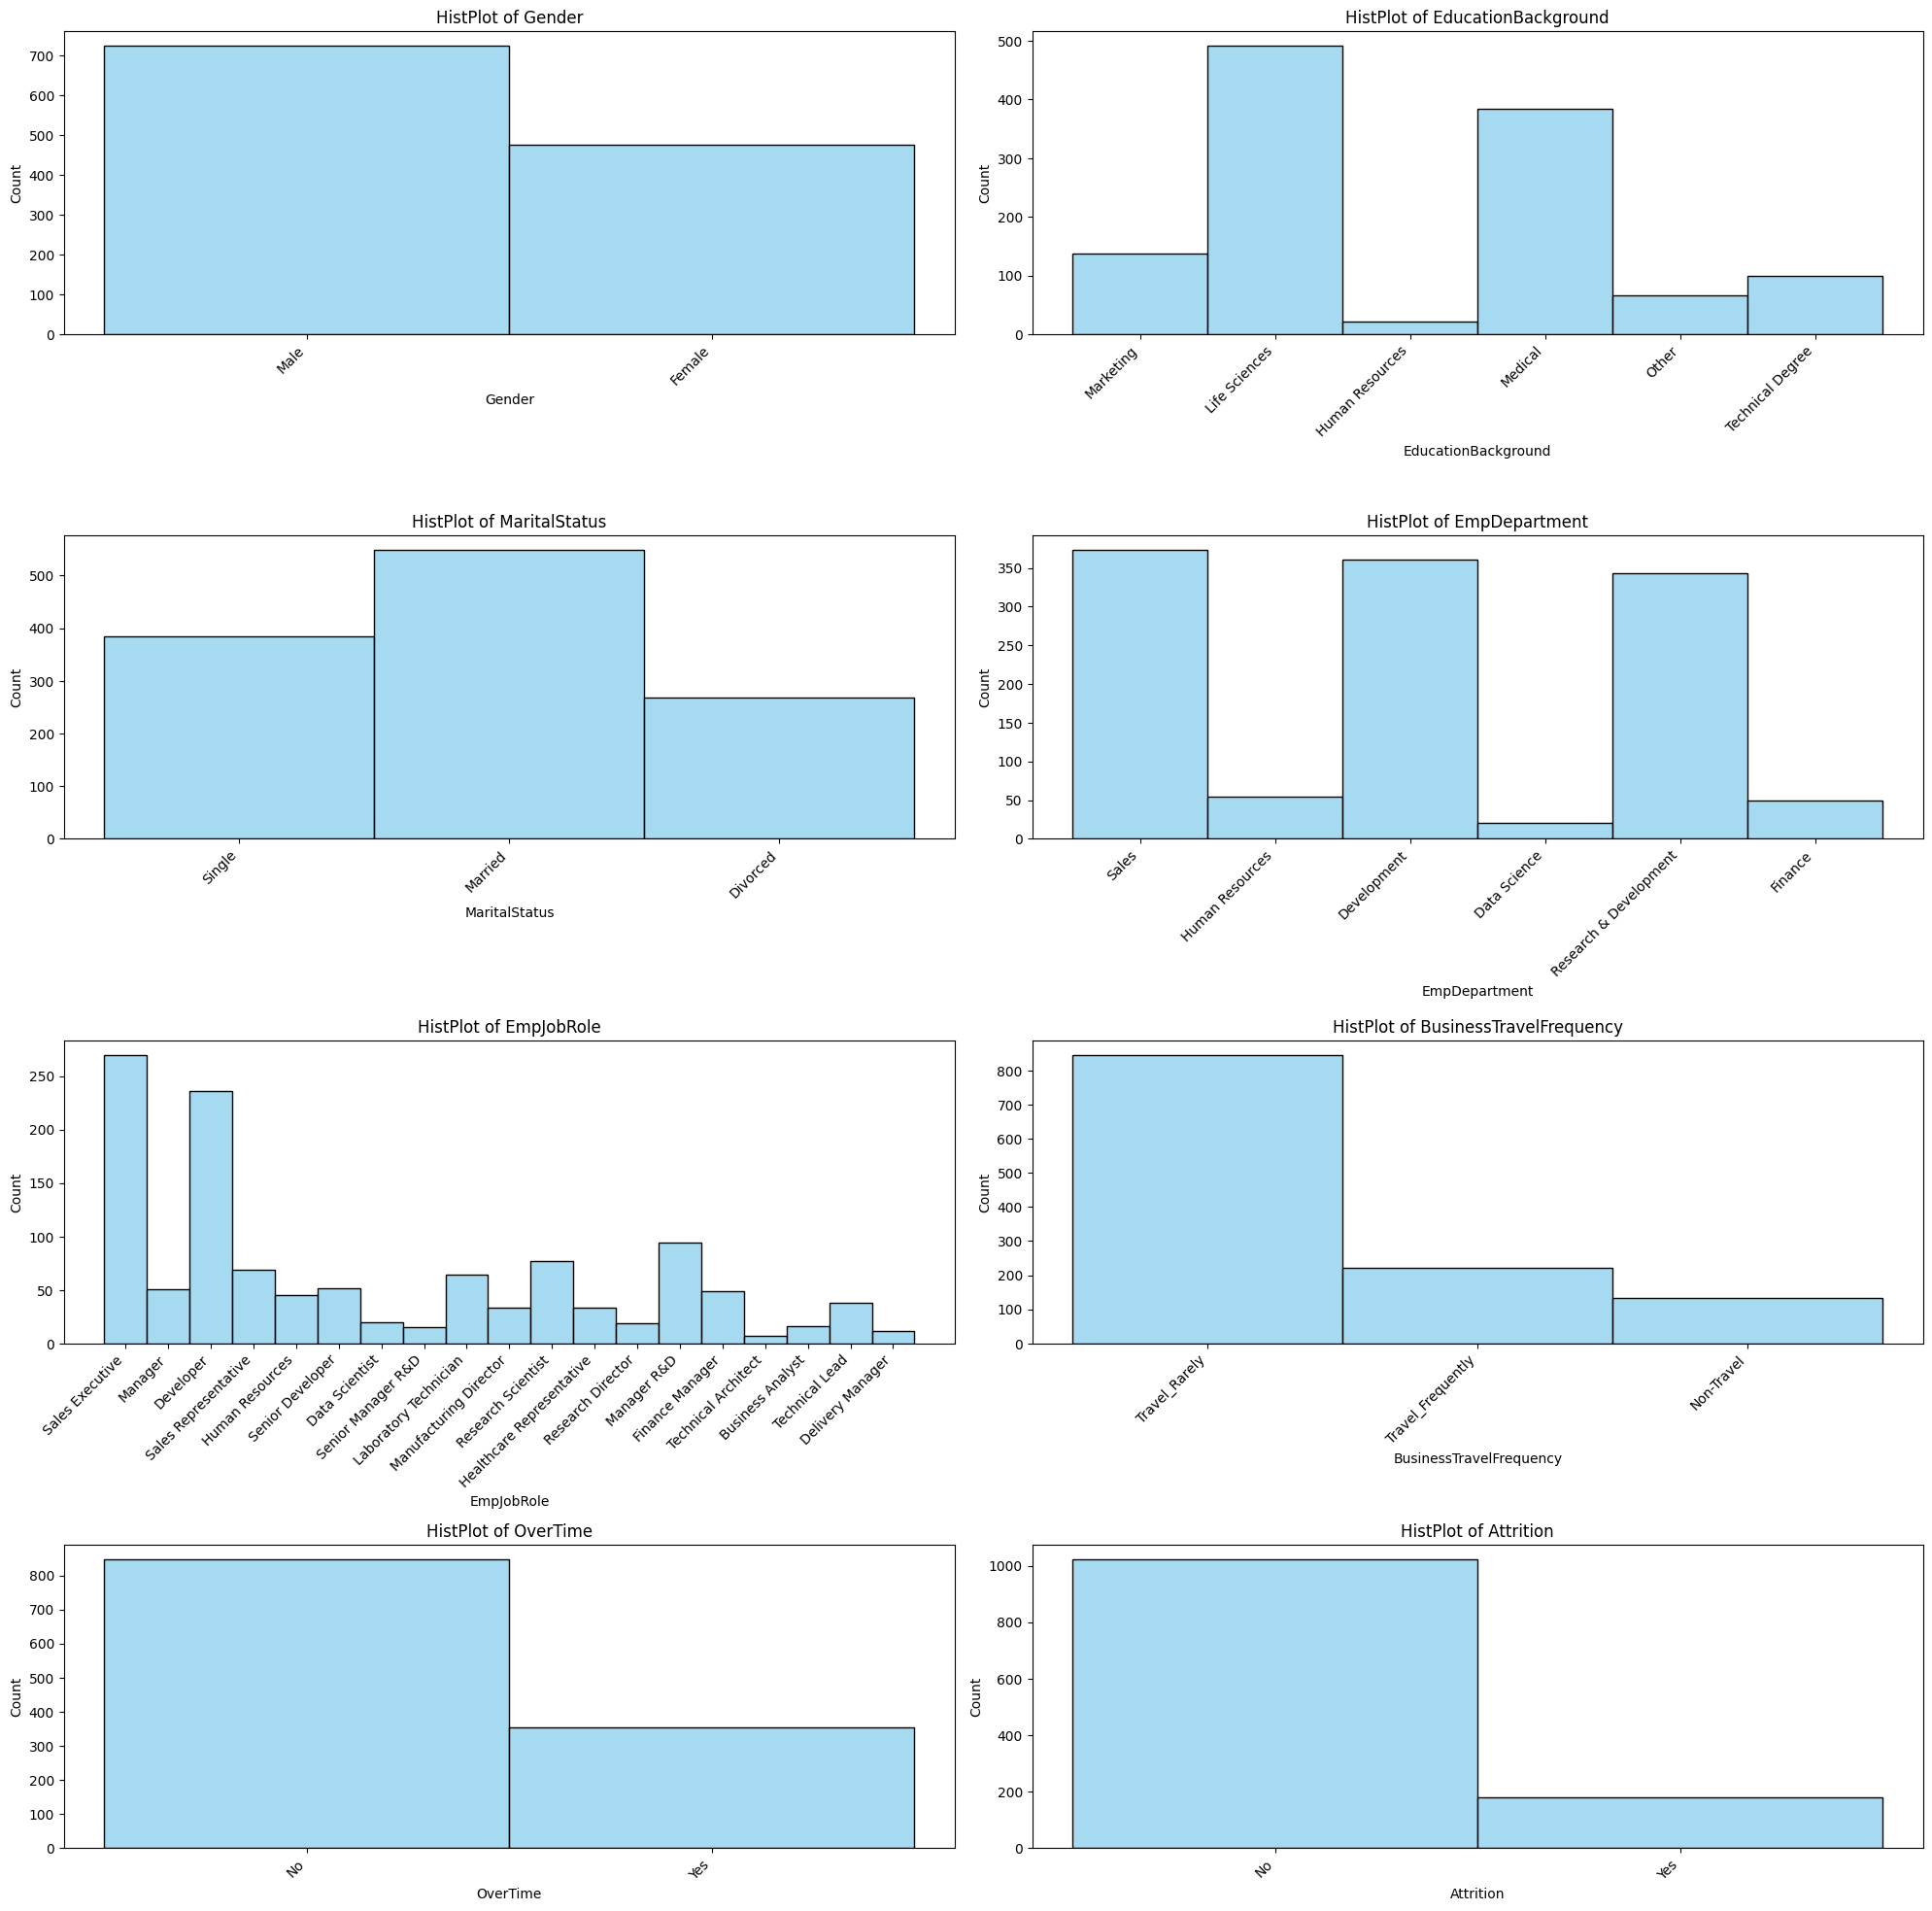

In [4]:
# All distibuted Columns
# Select categorical columns and exclude 'EmpNumber'
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols[categorical_cols != 'EmpNumber']  # Exclude 'EmpNumber'

# Create histplots for the selected categorical features
plt.figure(figsize=(20, 40))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 2, i)
    sns.histplot(data=data, x=col, color='skyblue')
    plt.title(f'HistPlot of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

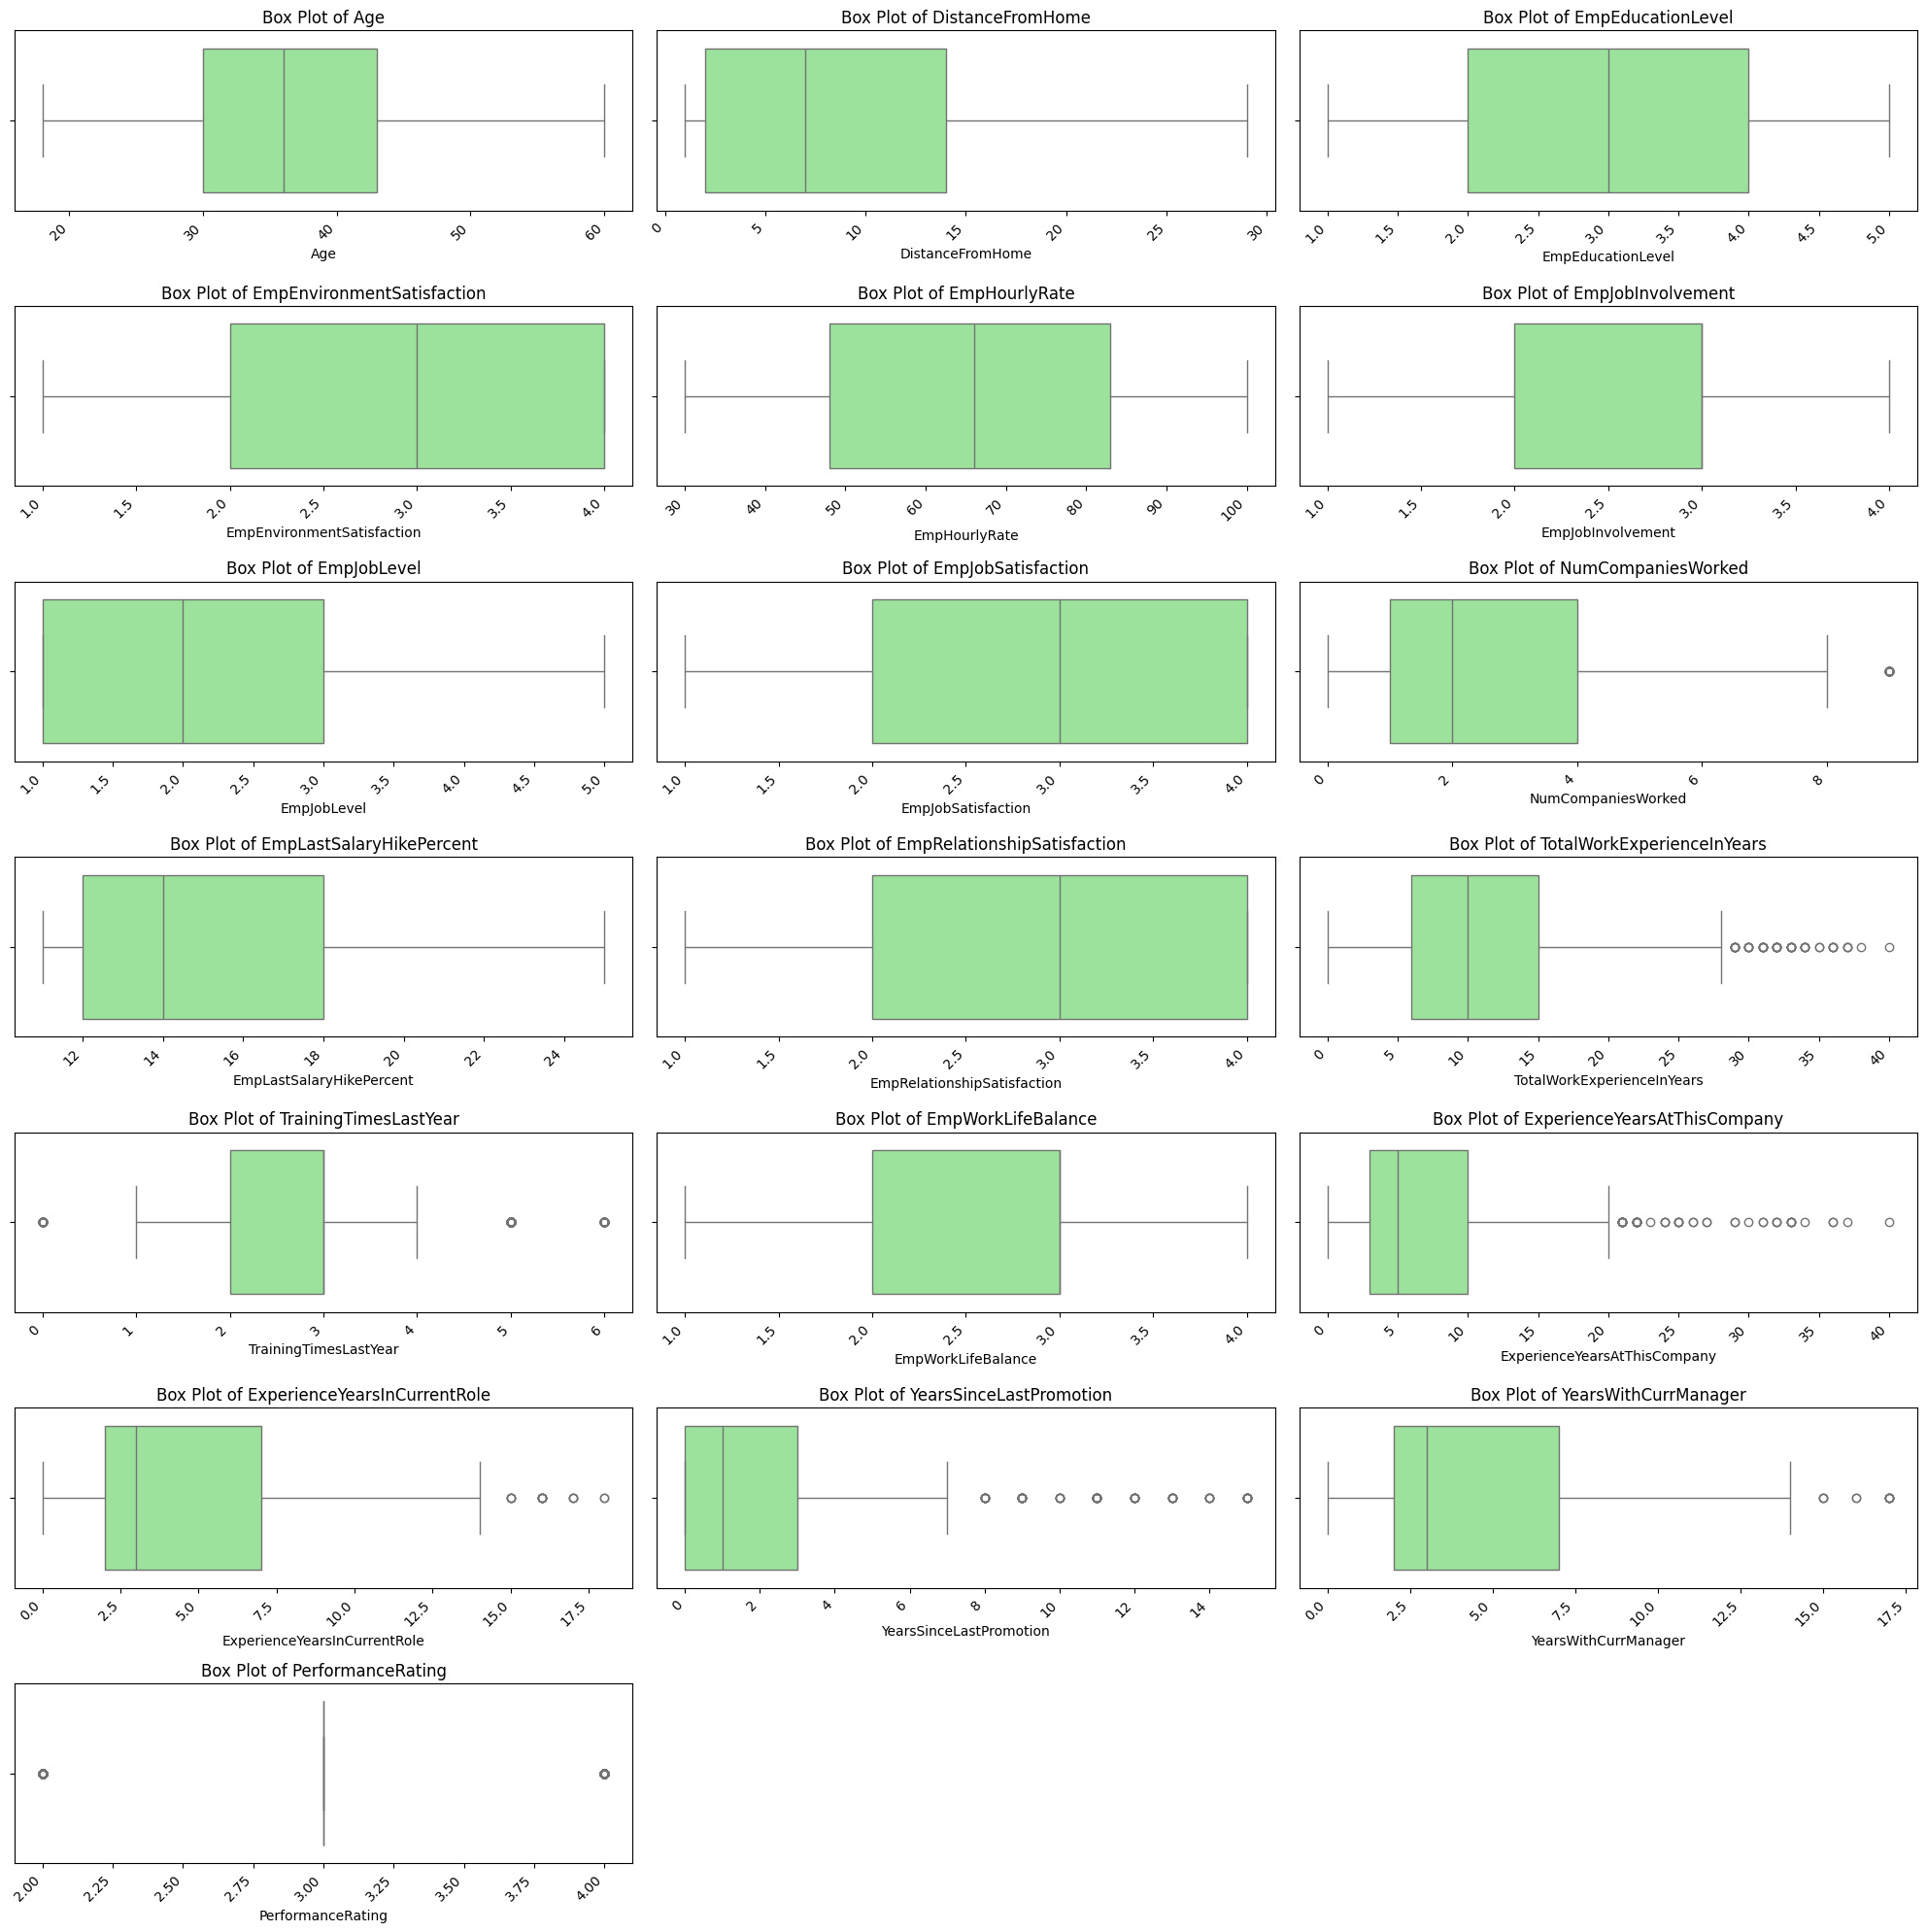

In [5]:
# Checking Outlier
# Visualize potential outliers in each feature using box plots.

# Select numerical columns and exclude 'EmpNumber'
numerical_cols = data.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols[numerical_cols != 'EmpNumber']  # Exclude 'EmpNumber'

# Create box plots for numerical features
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)  # Adjust subplot layout as needed
    sns.boxplot(data=data, x=col, color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Departement wise Performance

In [6]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept=data.loc[:,['EmpDepartment','PerformanceRating']]
dept

,EmpDepartment,PerformanceRating
0,Sales,3
1,Sales,3
2,Sales,4
3,Human Resources,3
4,Sales,3
...,...,...
1195,Sales,4
1196,Development,3
1197,Development,3
1198,Data Science,3


In [7]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept.groupby(by='EmpDepartment').mean()

,PerformanceRating
EmpDepartment,
Data Science,3.050000
Development,3.085873
Finance,2.775510
Human Resources,2.925926
Research & Development,2.921283
Sales,2.860590


C:\Users\satya\AppData\Local\Temp\ipykernel_16648\771410128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept.EmpDepartment, y=dept.PerformanceRating, palette='plasma')


<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

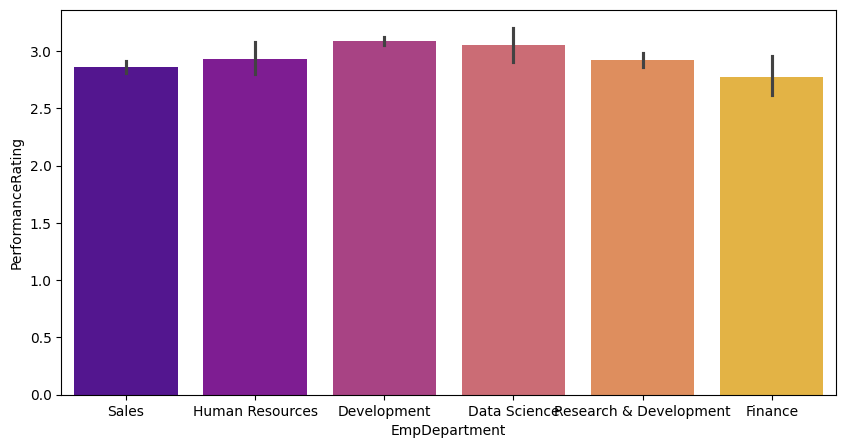

In [8]:
# departement wise performance
plt.figure(figsize=(10,5))
sns.barplot(x=dept.EmpDepartment, y=dept.PerformanceRating, palette='plasma')

In [9]:
#analyse each department seperately
dept.groupby(by='EmpDepartment').value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [10]:
# Creating the dept_rating DataFrame using groupby and value_counts
dept_rating = dept.groupby(by='EmpDepartment')['PerformanceRating'].value_counts().reset_index(name='counts')

C:\Users\satya\AppData\Local\Temp\ipykernel_16648\2606284868.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Sales'], palette='plasma')  # Filter data for Sales department
C:\Users\satya\AppData\Local\Temp\ipykernel_16648\2606284868.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Development'], palette='plasma')  # Filter data for Development department
C:\Users\satya\AppData\Local\Temp\ipykernel_16648\2606284868.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

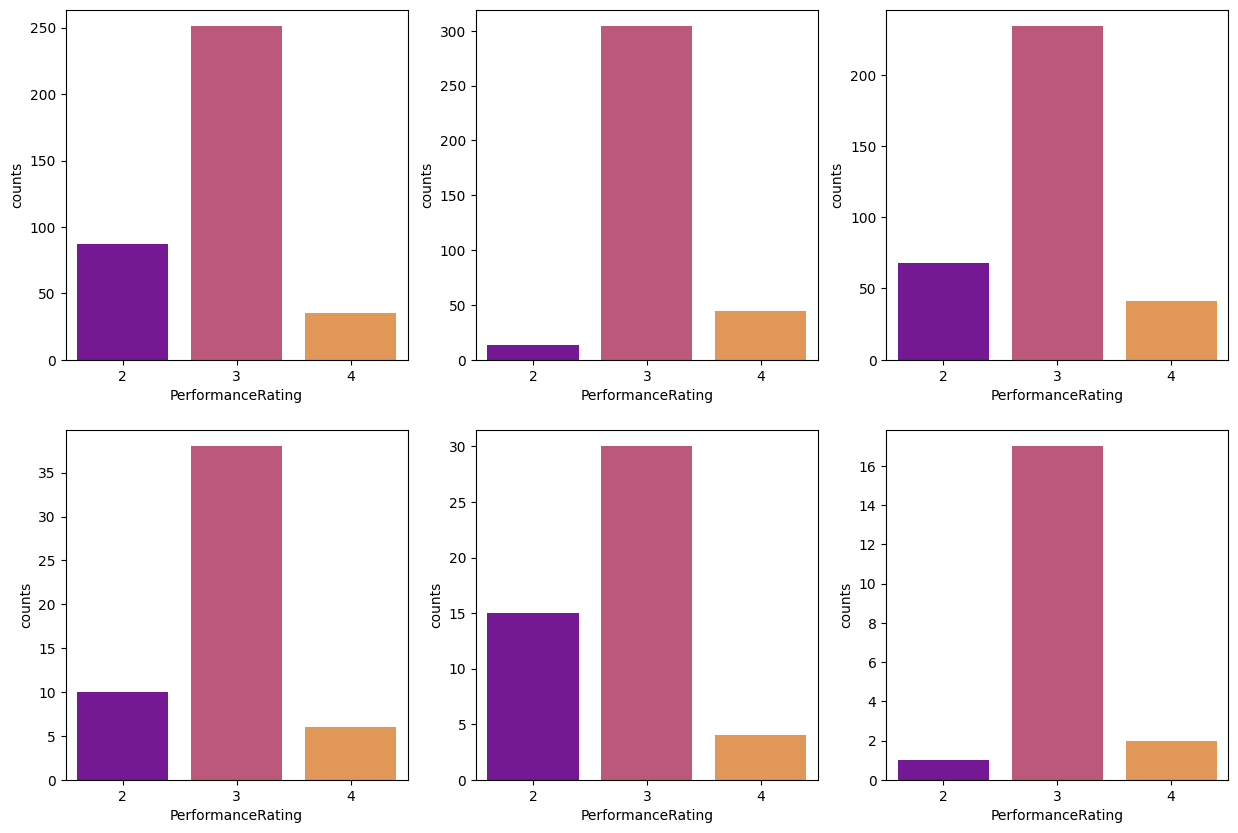

In [11]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Sales'], palette='plasma')  # Filter data for Sales department
plt.subplot(2,3,2)
sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Development'], palette='plasma')  # Filter data for Development department
plt.subplot(2,3,3)
sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Research & Development'], palette='plasma')  # Filter data for R&D department
plt.subplot(2,3,4)
sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Human Resources'], palette='plasma')  # Filter data for HR department
plt.subplot(2,3,5)
sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Finance'], palette='plasma')  # Filter data for Finance department
plt.subplot(2,3,6)
sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Data Science'], palette='plasma')  # Filter data for Data Science department
plt.show()

C:\Users\satya\AppData\Local\Temp\ipykernel_16648\520630153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EmpJobRole', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship


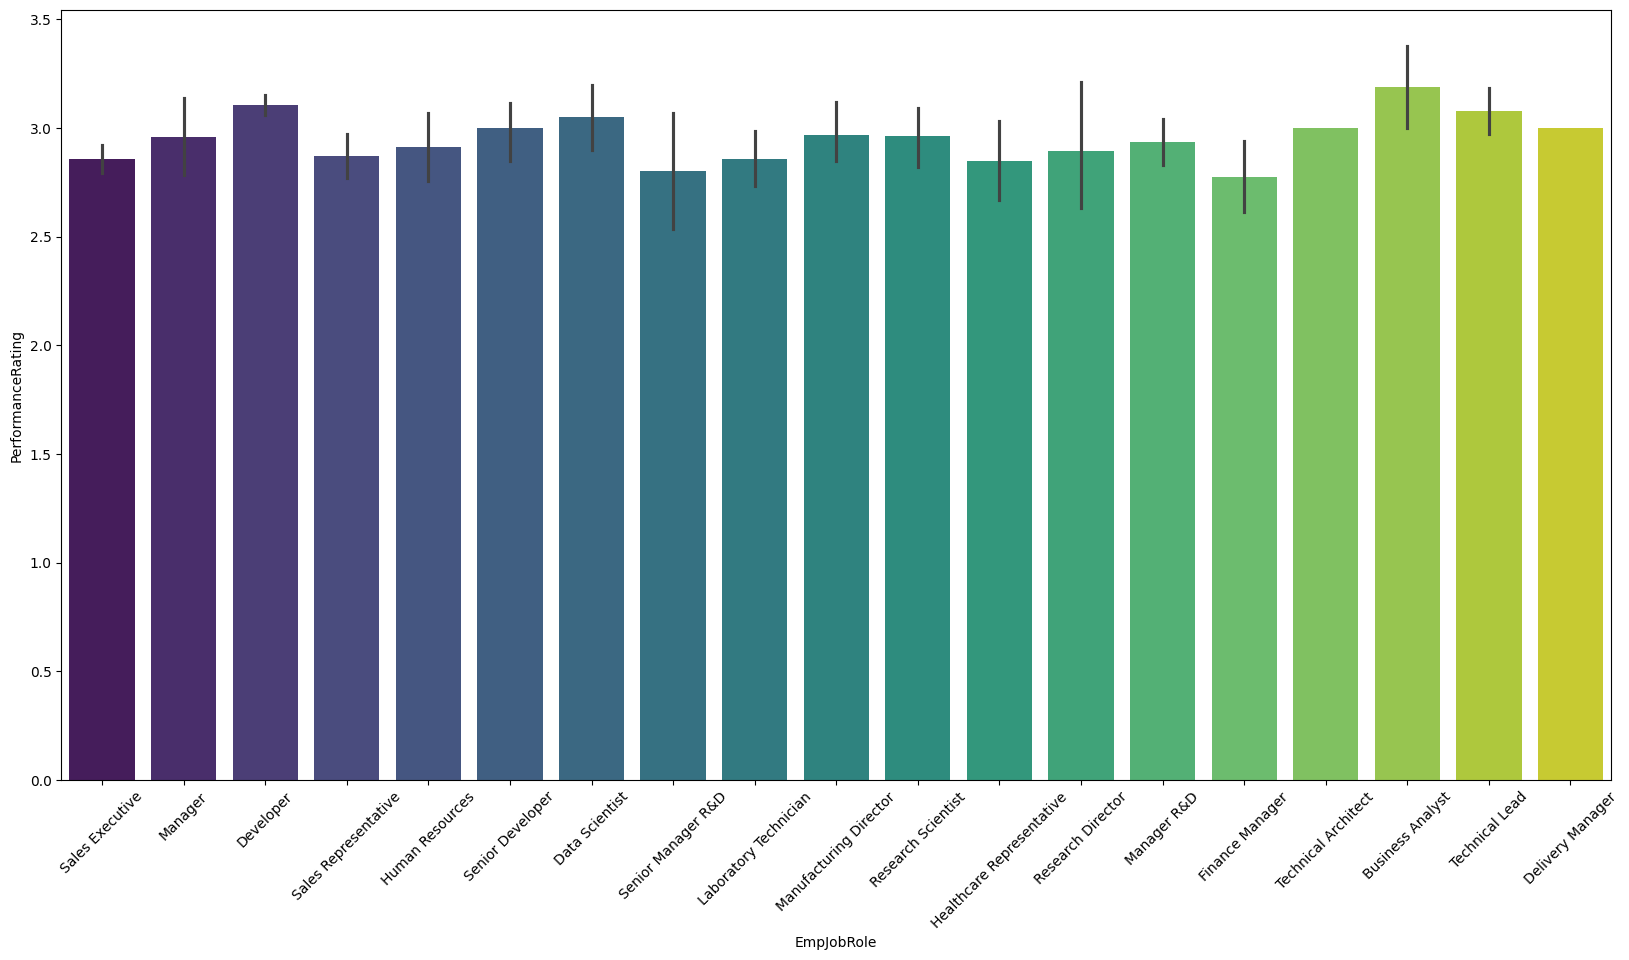

C:\Users\satya\AppData\Local\Temp\ipykernel_16648\520630153.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EducationBackground', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship


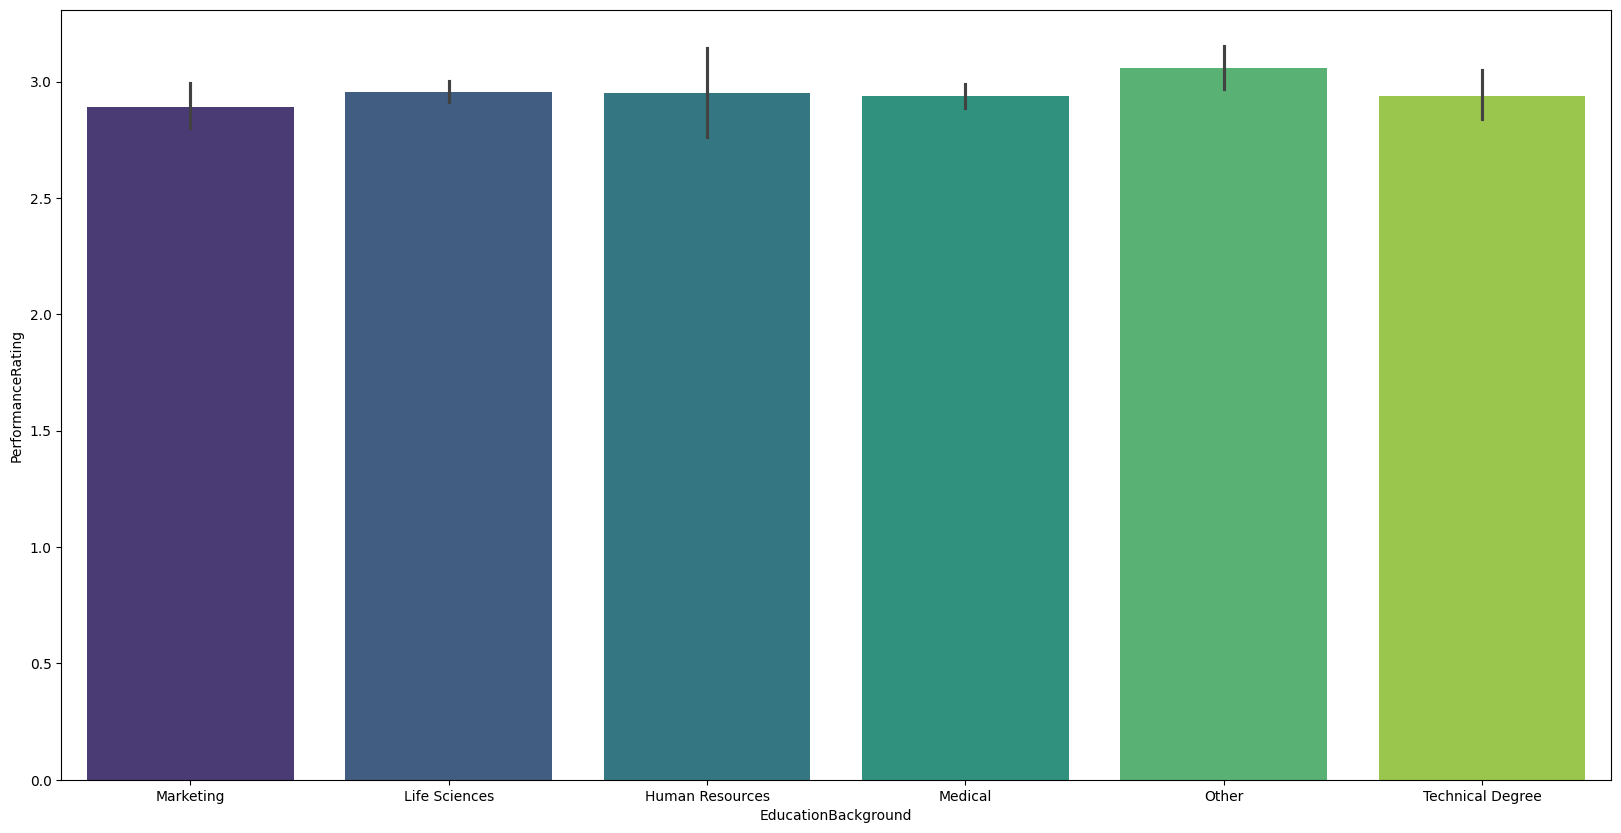

C:\Users\satya\AppData\Local\Temp\ipykernel_16648\520630153.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MaritalStatus', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship


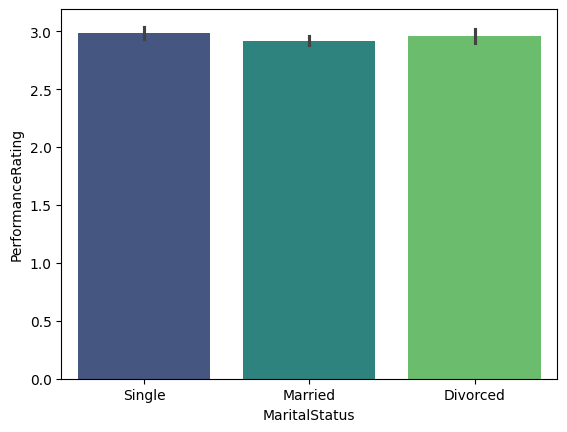

C:\Users\satya\AppData\Local\Temp\ipykernel_16648\520630153.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BusinessTravelFrequency', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship


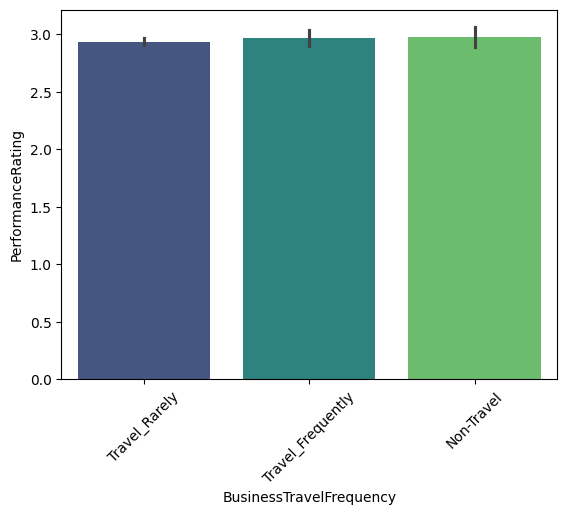

C:\Users\satya\AppData\Local\Temp\ipykernel_16648\520630153.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverTime', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship


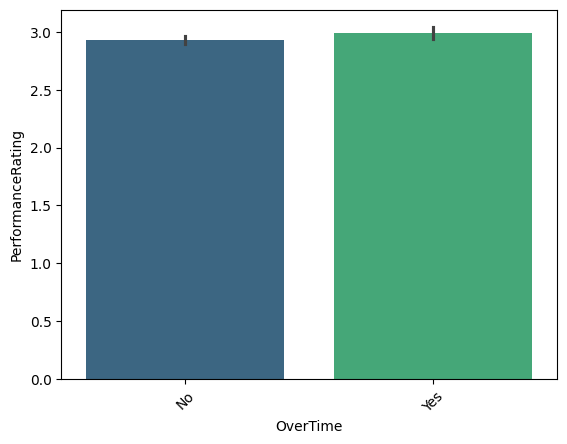

C:\Users\satya\AppData\Local\Temp\ipykernel_16648\520630153.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attrition', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship


<Axes: xlabel='Attrition', ylabel='PerformanceRating'>

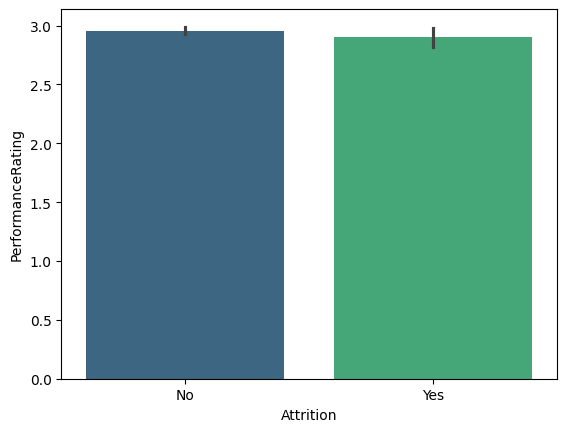

In [12]:
# Analyze the relationship between different categorical features and performance rating

# Performance Rating vs. Employee Job Role
plt.figure(figsize=(20, 10))  # Set the figure size for better visualization
sns.barplot(x='EmpJobRole', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

# Performance Rating vs.Education Background
plt.figure(figsize=(20, 10))  # Set the figure size for better visualization
sns.barplot(x='EducationBackground', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship
plt.show()  # Display the plot


# Performance Rating vs.Marital Status
sns.barplot(x='MaritalStatus', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship
plt.show()  # Display the plot

# Performance Rating vs.Business Travel Frequency
sns.barplot(x='BusinessTravelFrequency', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


# Performance Rating vs.Overtime Status
sns.barplot(x='OverTime', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

# Performance Rating vs.Attrition Status
sns.barplot(x='Attrition', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship
# This plot helps understand if there's a difference in performance rating between employees who left and those who stayed.

Employees in roles like Business Analyst, Technical Lead, Data Scientist, and Developer have generally performed well. Performance doesn't seem to be affected by marital status. Employees who work overtime tend to receive higher performance ratings compared to those who don't.

C:\Users\satya\AppData\Local\Temp\ipykernel_16648\2517823366.py:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



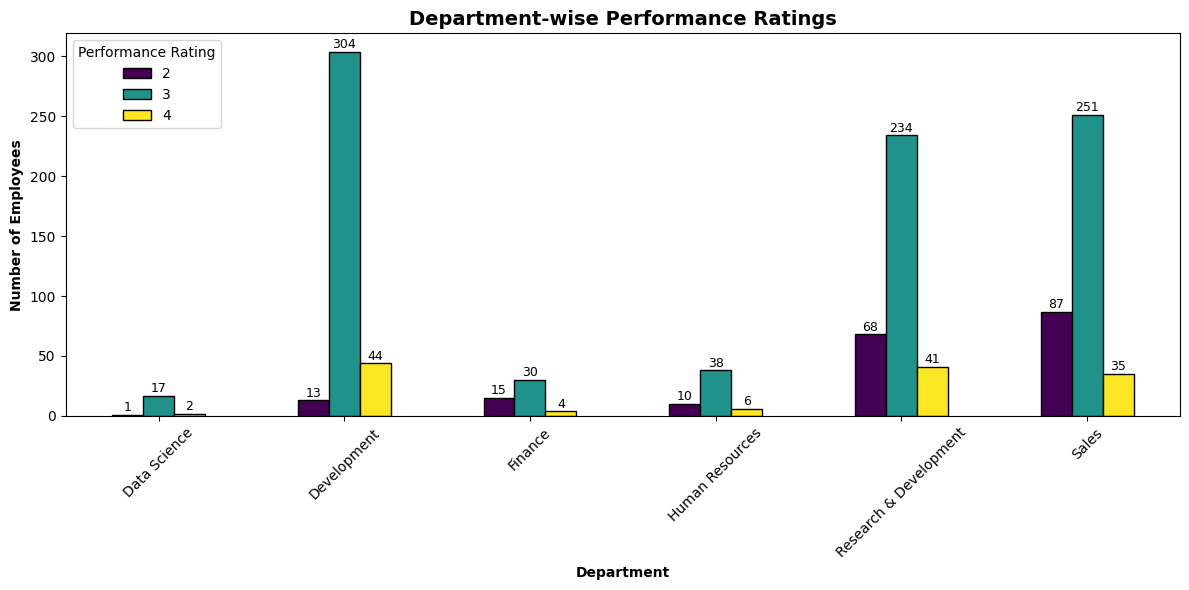

In [47]:
import matplotlib.cm as cm


# Crosstab: Rows = Department, Columns = Performance Rating
ct = pd.crosstab(data['EmpDepartment'], data['PerformanceRating'])

# Generate viridis colors based on the number of rating categories
num_categories = ct.columns.nunique()
viridis = cm.get_cmap('viridis', num_categories)
viridis_colors = [viridis(i) for i in range(num_categories)]

# Plot grouped bar chart with viridis colors
ax = ct.plot(kind='bar', figsize=(12, 6), color=viridis_colors, edgecolor='black')

# Titles and labels
ax.set_title('Department-wise Performance Ratings', fontsize=14, fontweight='bold')
ax.set_xlabel('Department', fontsize=10, fontweight='bold')
ax.set_ylabel('Number of Employees', fontsize=10, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Performance Rating', title_fontsize=10)

# Annotate bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5,
                int(height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

<Axes: xlabel='Gender', ylabel='EmpHourlyRate'>

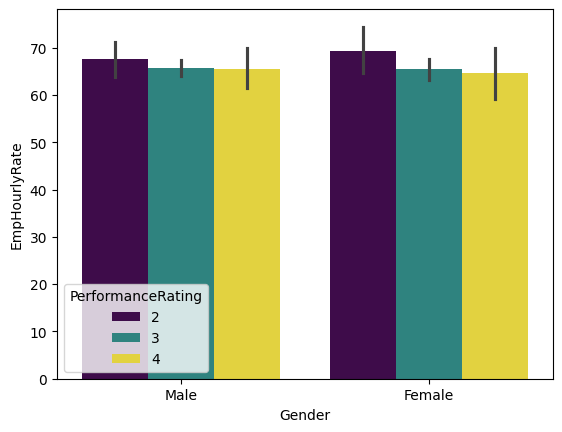

In [14]:
# Create a bar plot to visualize the relationship between Gender, Hourly Rate, and Performance Rating.
sns.barplot(x='Gender', y='EmpHourlyRate', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='Gender', ylabel='count'>

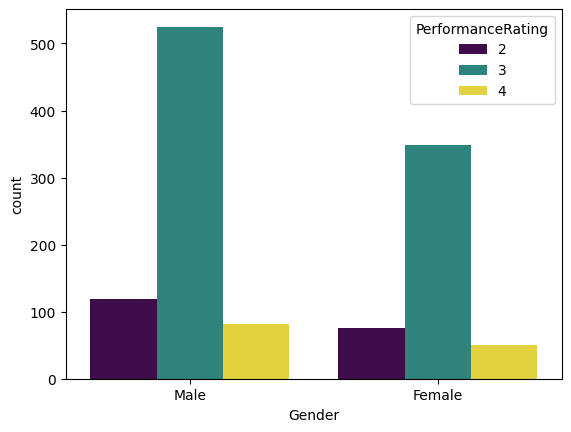

In [15]:
# Create a count plot to visualize the distribution of Performance Ratings across different Genders.
sns.countplot(x='Gender', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='EducationBackground', ylabel='Age'>

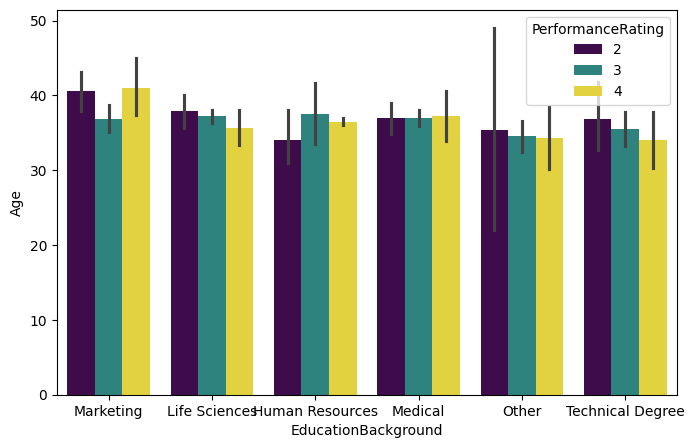

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='EducationBackground', y='Age', hue='PerformanceRating', data=data, palette='viridis') # Create a bar plot to visualize the relationship between Education Background, Age, and Performance Rating.

<Axes: xlabel='EducationBackground', ylabel='count'>

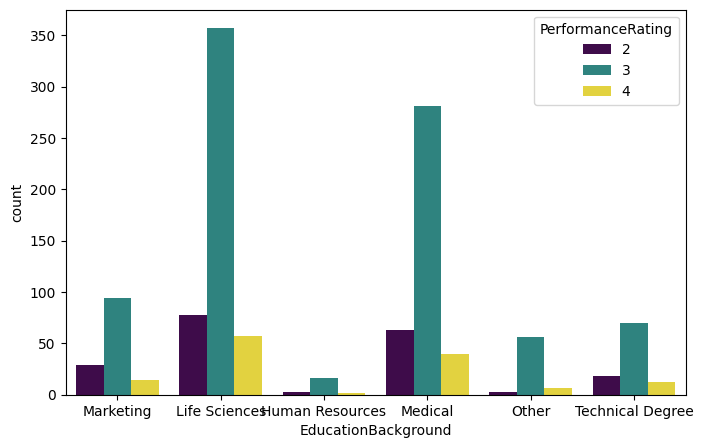

In [17]:
# Create a count plot to visualize the distribution of Performance Ratings across different Education Backgrounds.
plt.figure(figsize=(8,5))
sns.countplot(x='EducationBackground', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='MaritalStatus', ylabel='count'>

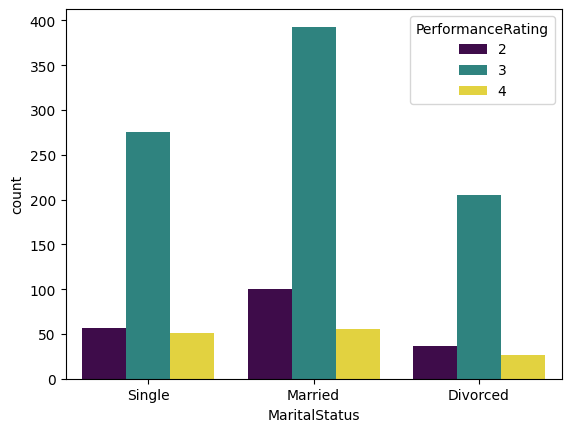

In [18]:
# Create a count plot to visualize the distribution of Performance Ratings across different Marital Statuses.
sns.countplot(x='MaritalStatus', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='EmpDepartment', ylabel='count'>

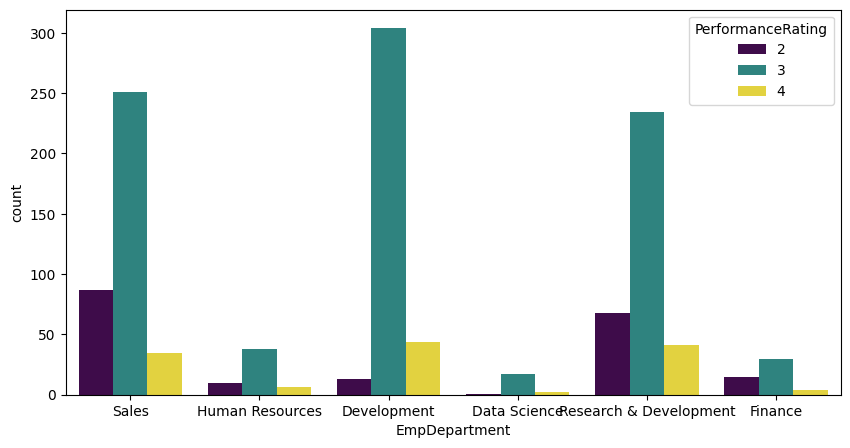

In [19]:
# Create a count plot to visualize the distribution of Performance Ratings across different Employee Departments.

plt.figure(figsize=(10,5))
sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='BusinessTravelFrequency', ylabel='count'>

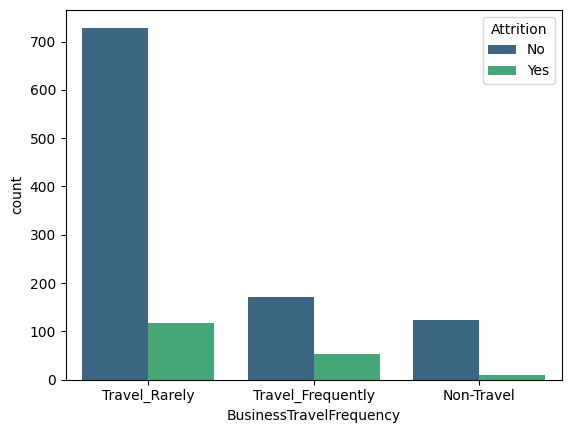

In [20]:
# Create a count plot to visualize the relationship between Business Travel Frequency and Attrition.
sns.countplot(x='BusinessTravelFrequency', hue='Attrition', data=data, palette='viridis')

<Axes: xlabel='BusinessTravelFrequency', ylabel='count'>

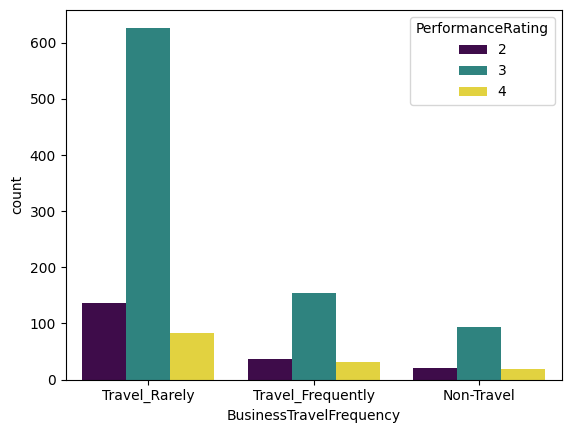

In [21]:
# Create a count plot to visualize the distribution of Performance Ratings across different Business Travel Frequencies.
sns.countplot(x='BusinessTravelFrequency', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='OverTime', ylabel='count'>

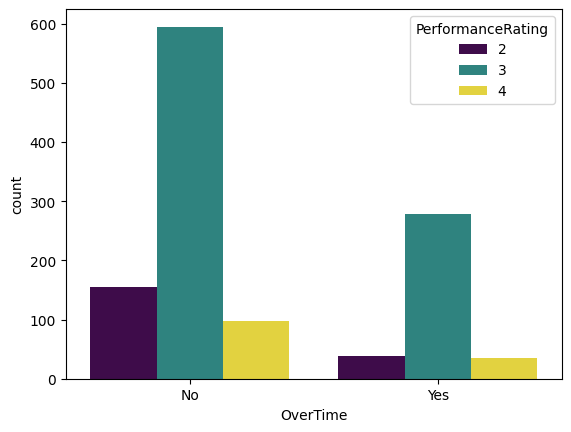

In [22]:
# Create a count plot to visualize the distribution of Performance Ratings for employees who work Overtime and those who don't.
sns.countplot(x='OverTime', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='Gender', ylabel='DistanceFromHome'>

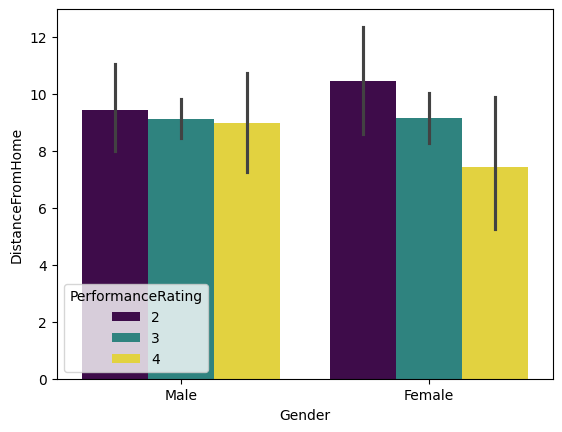

In [23]:
# Create a bar plot to visualize the relationship between Gender, Distance From Home, and Performance Rating.
sns.barplot(x=data.Gender, y=data.DistanceFromHome, hue=data.PerformanceRating, palette='viridis')

<Axes: xlabel='YearsWithCurrManager', ylabel='count'>

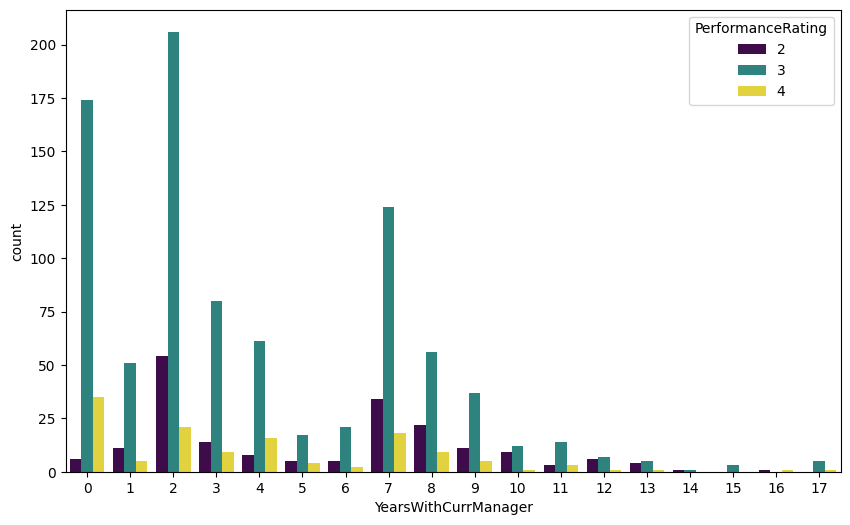

In [24]:
# Create a count plot to visualize the distribution of Performance Ratings across different lengths of time with the current manager.
plt.figure(figsize=(10,6))
sns.countplot(x='YearsWithCurrManager', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='YearsSinceLastPromotion', ylabel='count'>

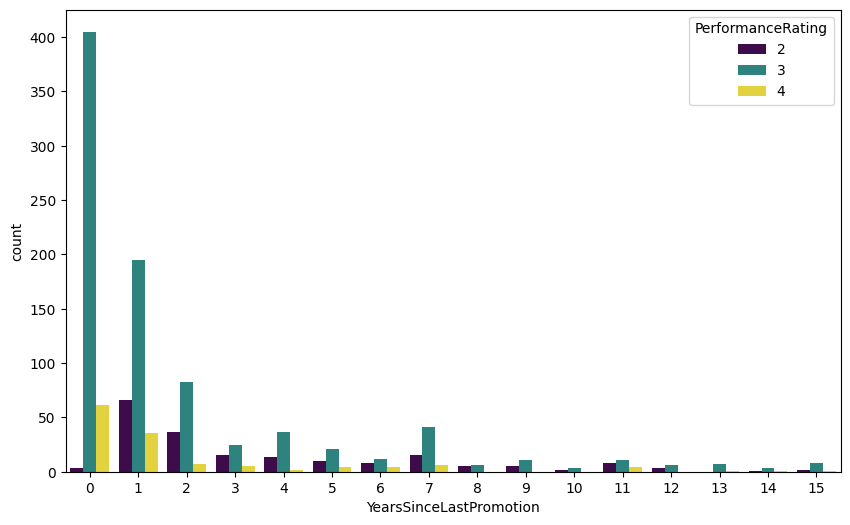

In [25]:
# Create a count plot to visualize the distribution of Performance Ratings across different periods since the last promotion.
plt.figure(figsize=(10,6))
sns.countplot(x='YearsSinceLastPromotion', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='EmpWorkLifeBalance', ylabel='count'>

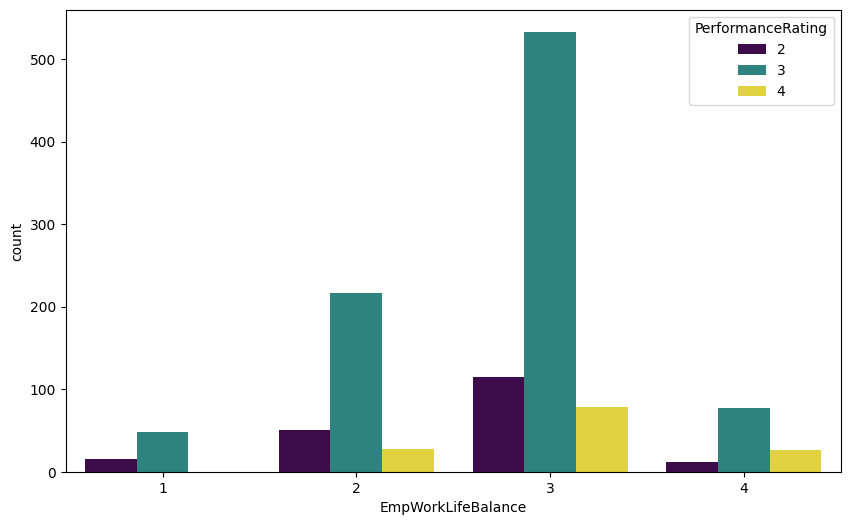

In [26]:
# Create a count plot to visualize the distribution of Performance Ratings across different Work-Life Balance ratings.
plt.figure(figsize=(10,6))
sns.countplot(x='EmpWorkLifeBalance', hue='PerformanceRating', data=data, palette='viridis') # Corrected: 'x' and 'hue' defined, data passed to 'data' param

<Axes: xlabel='EmpRelationshipSatisfaction', ylabel='count'>

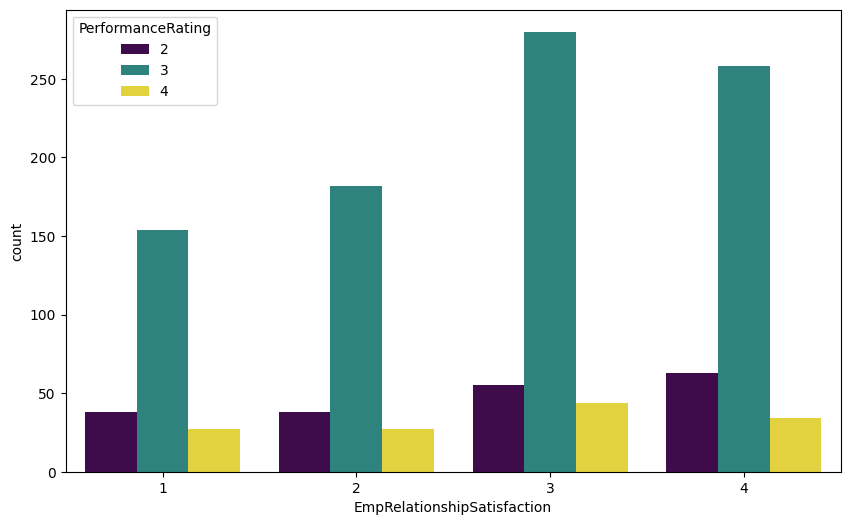

In [27]:
 # Create a count plot to visualize the distribution of Performance Ratings across different Employee Relationship Satisfaction levels.
plt.figure(figsize=(10,6))
sns.countplot(x='EmpRelationshipSatisfaction', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='TotalWorkExperienceInYears', ylabel='count'>

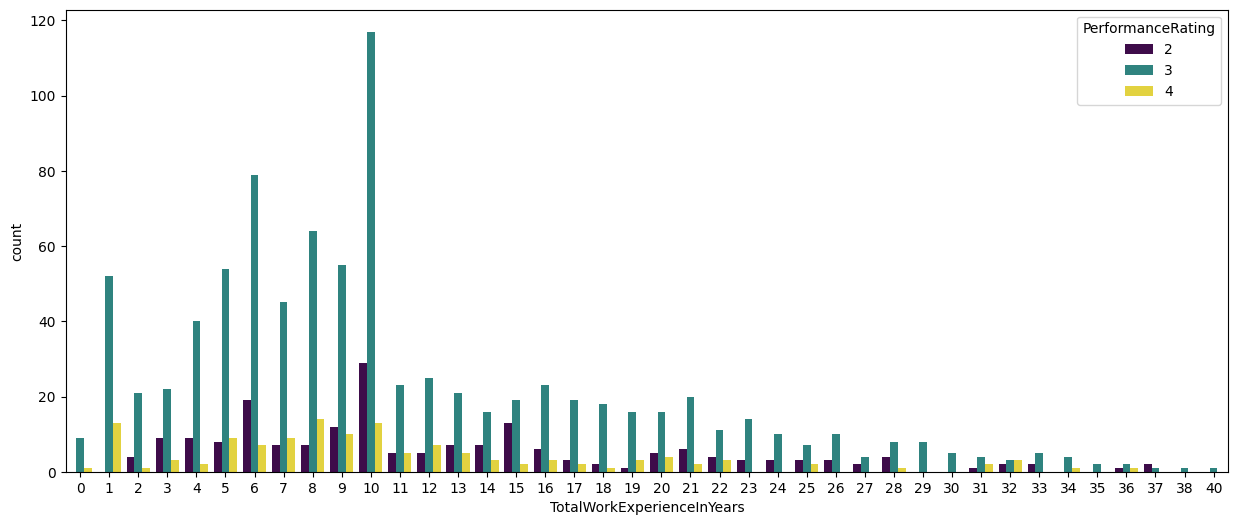

In [28]:
# Create a count plot to visualize the distribution of Performance Ratings across different levels of Total Work Experience In Years.
plt.figure(figsize=(15,6))
sns.countplot(x='TotalWorkExperienceInYears', hue='PerformanceRating', data=data, palette='viridis')

Employee performance seems to decline after they've worked for more than 10 years.

<Axes: xlabel='EmpLastSalaryHikePercent', ylabel='count'>

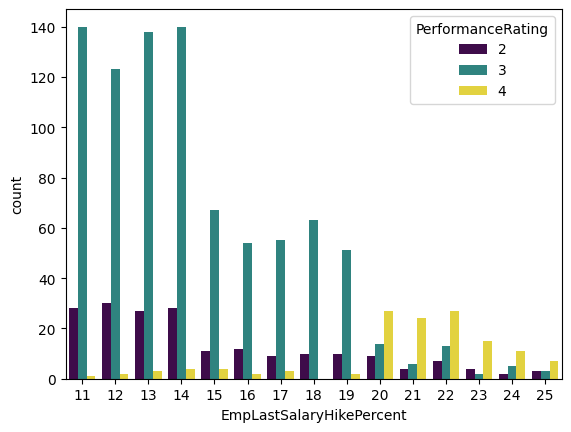

In [29]:
# Create a count plot to visualize the distribution of Performance Ratings across different Employee Last Salary Hike Percentages.
sns.countplot(x=data.EmpLastSalaryHikePercent, hue=data.PerformanceRating, palette='viridis')

It seems that when employees receive a pay raise of more than 19%, their performance tends to improve. This suggests that how well employees perform is linked to how much their salary increases. Employees who get bigger raises generally perform better.

<Axes: xlabel='EmpJobLevel', ylabel='EmpEnvironmentSatisfaction'>

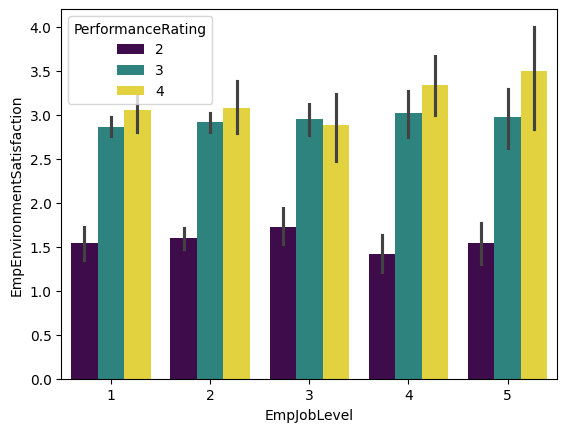

In [30]:
# Create a bar plot to visualize the relationship between Employee Job Level, Environment Satisfaction, and Performance Rating.
sns.barplot(x='EmpJobLevel', y='EmpEnvironmentSatisfaction', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='EmpDepartment', ylabel='DistanceFromHome'>

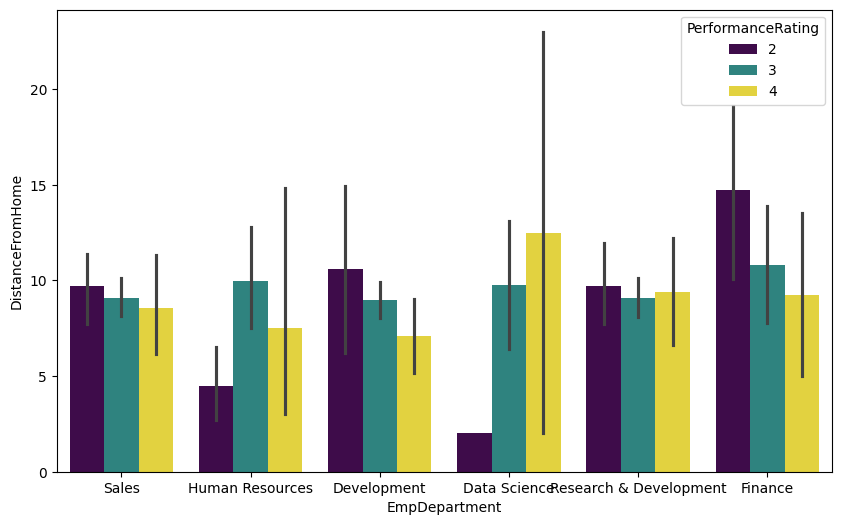

In [31]:
# Create a bar plot to visualize the relationship between Employee Department, Distance From Home, and Performance Rating.
plt.figure(figsize=(10,6))
sns.barplot(x='EmpDepartment', y='DistanceFromHome', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='EducationBackground', ylabel='EmpEducationLevel'>

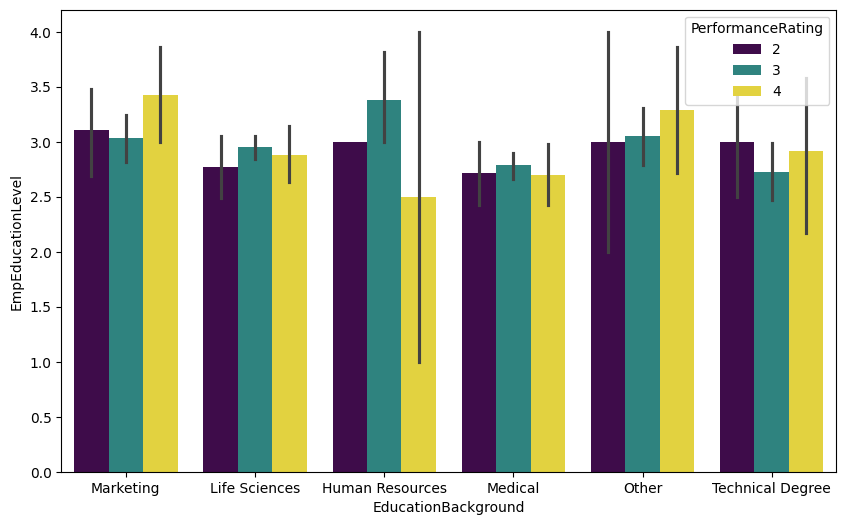

In [32]:
# Create a bar plot to visualize the relationship between Education Background, Employee Education Level, and Performance Rating.
plt.figure(figsize=(10,6))
sns.barplot(x='EducationBackground', y='EmpEducationLevel', hue='PerformanceRating', data=data, palette='viridis') # Corrected: 'x', 'y', and 'data' specified as keyword arguments

C:\Users\satya\AppData\Local\Temp\ipykernel_16648\2527786381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y='YearsSinceLastPromotion', data=data, palette='viridis')


<Axes: xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

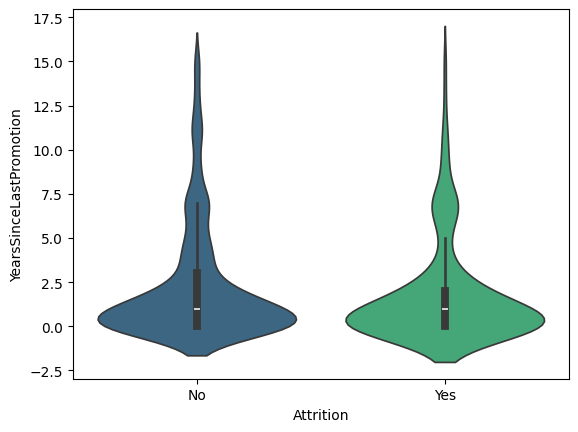

In [33]:
# Create a violin plot to visualize the distribution of 'YearsSinceLastPromotion' for employees who left (Attrition='Yes') and those who stayed (Attrition='No').
sns.violinplot(x='Attrition', y='YearsSinceLastPromotion', data=data, palette='viridis')

In [34]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
# Create a pie chart to visualize the relationship between performance rating, job satisfaction, and job involvement.
import plotly.express as px
fig = px.pie(data, values='EmpJobSatisfaction', names= 'PerformanceRating', color= 'EmpJobInvolvement',
            title = 'Performance rating as per job involvement & job satisfaction',width=600, height=400)
fig.show()

As we can observe from the above diagram, about 11% and 16% of employees who are less satisfied and less involved in their jobs also show lower performance.

In [36]:
#Employee last salary hike percent
 # Create a cross-tabulation to analyze the relationship between Employee Last Salary Hike Percentage and Performance Rating.
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


In [37]:
# Employee Work life balance
# Create a cross-tabulation to analyze the relationship between Employee Work-Life Balance and Performance Rating.
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpWorkLifeBalance,,,,
1,16,48,0,64
2,51,216,27,294
3,115,533,79,727
4,12,77,26,115
All,194,874,132,1200


In [38]:
# Calculate the percentage distribution of Performance Ratings across different Employee Departments, including overall margins.
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


The data clearly shows which employees have low performance, aren't very engaged in their work, and have 2 years or less of experience.

In [39]:
# Filtering those employees whose performance rating is low (2), have not left the company (Attrition='No'),
# have low job involvement (<= 2), and have been with the company for 2 years or less.
low_per=data.loc[(data['PerformanceRating']==2) & (data['Attrition']=='No')& (data['EmpJobInvolvement']<= 2)&
                 (data['ExperienceYearsAtThisCompany'] <= 2),['EmpNumber','ExperienceYearsAtThisCompany',
                                                              'EmpJobInvolvement','Attrition','PerformanceRating']]
low_per

,EmpNumber,ExperienceYearsAtThisCompany,EmpJobInvolvement,Attrition,PerformanceRating
165,E1001300,2,2,No,2
182,E1001322,2,2,No,2
605,E1002079,2,2,No,2
728,E1002291,2,2,No,2
878,E100461,2,2,No,2
1023,E100702,2,2,No,2


Based on our second goal, these 6 underperforming employees could be penalized or given a final warning about their performance.

From the visualizations above, it's clear that salary, work environment, job satisfaction, and employee experience have a significant impact on performance ratings. Management should focus on these areas to improve employee performance.


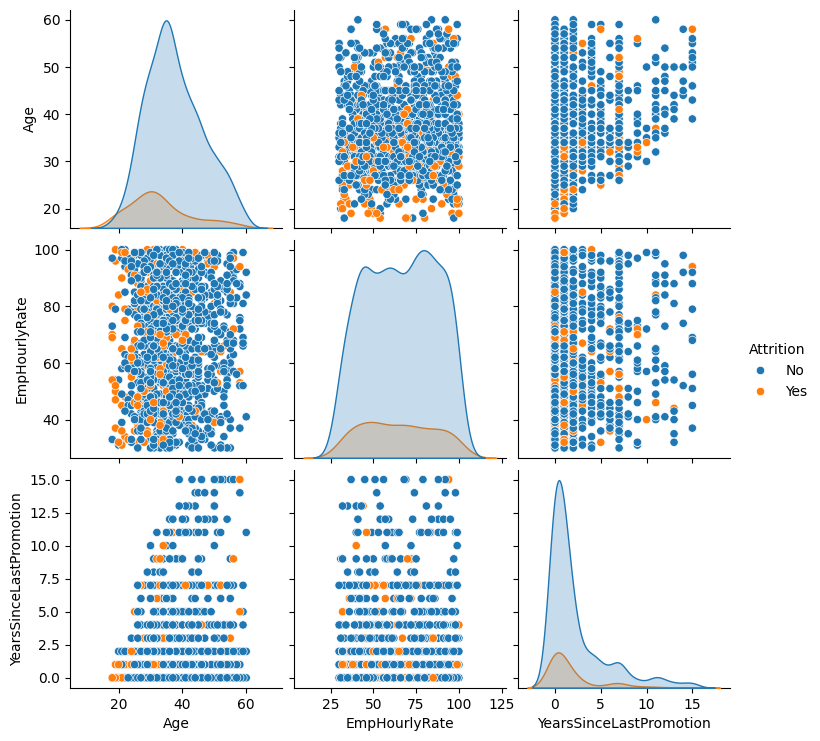

In [40]:
# Create a pair plot to visualize the relationships between Age, Hourly Rate, Years Since Last Promotion, and Attrition, colored by Attrition status.
sns.pairplot(data[['Age', 'EmpHourlyRate', 'YearsSinceLastPromotion', 'Attrition']], hue='Attrition')


### Recalculating Weighted Averages:

| Department                 | Rating 2 | Rating 3 | Rating 4 | Weighted Score Calculation               | Weighted Score |
| -------------------------- | -------- | -------- | -------- | ---------------------------------------- | -------------- |
| **Data Science**           | 1        | 17       | 2        | (2×1 + 3×17 + 4×2) / 20 = (61) / 20      | **3.05**       |
| **Development**            | 13       | 304      | 44       | (2×13 + 3×304 + 4×44) / 361 = 1186 / 361 | **3.29**       |
| **Finance**                | 15       | 30       | 4        | (2×15 + 3×30 + 4×4) / 49 = 158 / 49      | **3.22**       |
| **Human Resources**        | 10       | 38       | 6        | (2×10 + 3×38 + 4×6) / 54 = 182 / 54      | **3.37**       |
| **Research & Development** | 68       | 234      | 41       | (2×68 + 3×234 + 4×41) / 343 = 1120 / 343 | **3.27**       |
| **Sales**                  | 87       | 251      | 35       | (2×87 + 3×251 + 4×35) / 373 = 1191 / 373 | **3.19**       |


### Final Department Ranking by Weighted Performance Score:


| Rank | Department                 | Weighted Score |
| ---- | -------------------------- | -------------- |
| 1    | **Human Resources**        | 3.37           |
| 2    | **Development**            | 3.29           |
| 3    | **Research & Development** | 3.27           |
| 4    | **Finance**                | 3.22           |
| 5    | **Sales**                  | 3.19           |
| 6    | **Data Science**           | 3.05           |